# Área de imports

In [1]:
import pandas as pd
import seaborn as sns
import texthero as hero
import matplotlib.pyplot as plt

# Carregamento dos dados

In [2]:
df = pd.read_csv('./data/SMSSpamCollection.txt', sep='\t', names=["label", "message"])

# Análise exploratória dos dados

#### Colunas presentes

In [3]:
list(df.columns)

['label', 'message']

#### Quantidade de observações

In [16]:
df.shape[0]

5572

#### Visualizando amostra por coluna

In [4]:
df[df['label'] == 'spam'].head(5)

,label,message
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
5,spam,FreeMsg Hey there darling it's been 3 week's n...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."


In [5]:
df[df['label'] == 'ham'].head(5)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
6,ham,Even my brother is not like to speak with me. ...


#### Dados faltantes por coluna

In [6]:
df.isna().sum()

label      0
message    0
dtype: int64

#### Distribuição de classes

<AxesSubplot:>

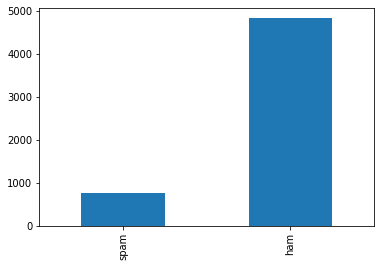

In [7]:
df.label.value_counts().sort_values().plot(kind = 'bar')

#### Média do tamanho da mensagem por classe

In [8]:
# Cria uma nova coluna com o tamanho da mensagem
df['message-size'] = df['message'].apply(lambda x: len(x))

# Calcula a média por classe
df.groupby('label')['message-size'].mean()

label
ham      71.482487
spam    138.670683
Name: message-size, dtype: float64

#### As #20 Palavras mais comuns do dataset

In [9]:
# Removendo "stopwords", dígitos, e pontuação
custom_pipeline = [hero.preprocessing.lowercase,
                   hero.preprocessing.remove_digits,
                   hero.preprocessing.remove_punctuation,
                   hero.remove_stopwords]

df['message'] = hero.clean(df["message"], custom_pipeline)

In [17]:
# selecionando as 20 palavras mais frequentes
top_20 = pd.Series(' '.join(df["message"]).lower().split()).value_counts()[:20].to_dict()

/home/lucasrotsen/Git_Repos/tcc_case_study_tutorial/.env/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


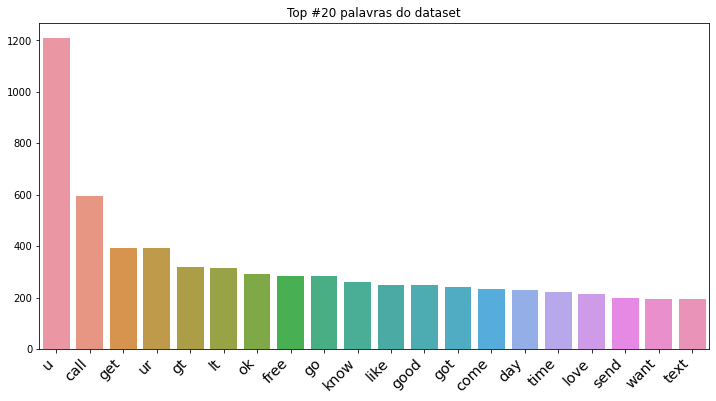

In [18]:
# plotando a informação em um gráfico
plt.figure(figsize=(12,6))

chart = sns.barplot(
    list(top_20.keys()), 
    list(top_20.values())
).set_title('Top #20 palavras do dataset')

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

plt.show()